<a href="https://colab.research.google.com/github/GoAshim/Deep-Learning-with-TensorFlow/blob/main/05_Multiclass_Classification_with_Tensorflow_Image_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification
In Multiclass Classification we build neural network model using Tensorflow to predict outcome which can be one of 3 or more classes. In this project, we are going to build neural network model which will classify images different types (more than 2) of clothing.

We have seen in previous project how to handle **binary classification**, where we built neural network model to predict whether a person has breast cancer or not (click [here](https://github.com/GoAshim/Deep-Learning-with-TensorFlow/blob/a62a4a5e741d9d0b2911d55edc2f6fcf1ef7291f/04_Binary_Classification_using_TensorFlow_Predict_Breast_Cancer.ipynb))

### Step 1 - Import Libraries

In [1]:
# Import necessary libraries

# For data analysis and modeling
import random as rnd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# For the dataset
from tensorflow.keras.datasets import fashion_mnist

### Step 2 - Load Data
We will load the data publicly available fashion_mnist dataset (can be found [here](https://www.tensorflow.org/datasets/catalog/fashion_mnist)). Like other tensorflow datasets, this one is already split between train and test datasets.

In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Step 3 - Exploratory Data Analysis (EDA)

In [3]:
# Print the first element of training data and label

print("First data element: ", X_train[0])
print("\nFirst label element: ", y_train[0])

First data element:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

In [4]:
# Check the shape of the training data and training labels
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [5]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

#####Observation
So from the above code we see that
* The training and test dataset consist of 60000 and 10000 images and their corresponding labels.  
* Each element of training data (image) is 2 dimensional matrix of 28 by 28 (pixels).
* The label is one number representing each type of image, so it's scaler and hence has 0 dimension.

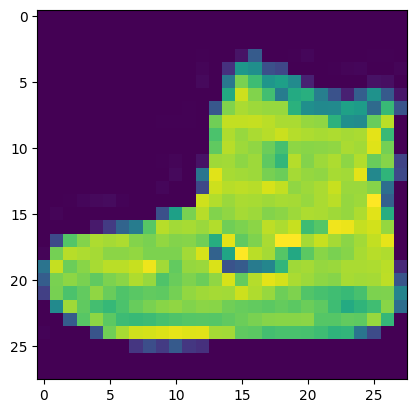

In [6]:
# Plot the first element of training data (we saw the number value representing every pixel of that data element)
plt.imshow(X_train[0]);

In [7]:
# Print the label of the first element again
y_train[0]

9

In [8]:
# Let's create the list with labels from the fashion mnist dataset
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
# Now we can use the labels list to see the label for the first data element of the training set
print("The first element of the training dataset represents ", labels[y_train[0]])

The first element of the training dataset represents  Ankle boot


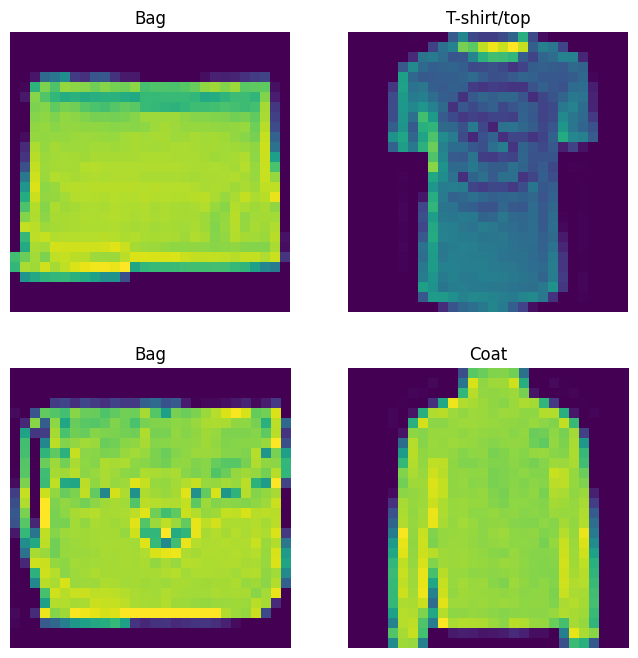

In [10]:
# Now instead of checking the data element and the corresponding label of one element at a time, let's write code to plot
# 4 the image and the corresponding label of 4 random data elements. We can run that set of code multiple times to get better
# understanding of our data

plt.figure(figsize=(8, 8))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  # Pick a random number, which will be the index of the element we want to plot
  ind = rnd.choice(range(len(X_train)))
  plt.imshow(X_train[ind])
  plt.title(labels[y_train[ind]])
  plt.axis(False);

### Step 4 - Build Multi-class Classification Model

#### Experiment 1
Build the first model with 2 hidden layers, fit it with the training data and see how it evaluates on the test data.

In [30]:
# Create random seed
tf.random.set_seed(42)

# Build the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # The shape of each element of training data
    tf.keras.layers.Dense(4, activation="relu"), # First hidden layer with 4 nurons and relu activation
    tf.keras.layers.Dense(4, activation="relu"), # Second hidden layer with 4 nurons and relu activation
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # Output layer with 10 nurons, one for each of the 10 output classes
])

# Compile the model
model_01.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Using SparseCategoricalCrossentropy because our data isn't encoded
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
hist_01 = model_01.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2052 - accuracy: 0.1838 - val_loss: 2.0513 - val_accuracy: 0.1887
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0048 - accuracy: 0.2071 - val_loss: 1.9063 - val_accuracy: 0.2305
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7676 - accuracy: 0.2784 - val_loss: 1.7495 - val_accuracy: 0.2666
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5814 - accuracy: 0.3192 - val_loss: 1.5262 - val_accuracy: 0.3393
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4997 - accuracy: 0.3278 - val_loss: 1.4683 - val_accuracy: 0.3264
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4609 - accuracy: 0.3310 - val_loss: 1.5558 - val_accuracy: 0.2806
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4487 - accuracy: 0.3327 - val_loss: 1.4485 - val_accuracy:

###### Observation
Based on above result, we see after 10 epochs our first model has 33% accuracy. As our data has 10 output classes, if we make random guess, we should get 10% accuracy. So our model is 3 times better predicting the output than pure random guess. However we will do few more experiments to see if we can improve the model accuracy.

#### Experiment 2
Let's remove 1 hidden layer but increasing the number of nurons and see if that impacts on model accuracy. Having less layers mean the model will be simpler and will run faster.

In [31]:
# Create random seed
tf.random.set_seed(42)

# Build the model
model_02 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_02.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model with training data and evaluate on test data
hist_02 = model_02.fit(X_train,
                       y_train,
                       epochs=10,
                       validation_data=(X_test, y_test)
                       )

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 3.3726 - accuracy: 0.6888 - val_loss: 0.8104 - val_accuracy: 0.7025
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6899 - accuracy: 0.7303 - val_loss: 0.6631 - val_accuracy: 0.7759
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5794 - accuracy: 0.7936 - val_loss: 0.5505 - val_accuracy: 0.8081
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5242 - accuracy: 0.8173 - val_loss: 0.5729 - val_accuracy: 0.8064
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5056 - accuracy: 0.8280 - val_loss: 0.5977 - val_accuracy: 0.8116
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4946 - accuracy: 0.8294 - val_loss: 0.5540 - val_accuracy: 0.8111
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4801 - accuracy: 0.8344 - val_loss: 0.5093 - val_accurac

###### Observation
Based on above result, we see after 10 epochs our second model has 83% accuracy. So we can infer that by reducing one hidden layer and increasing the number of nurons in the remaining hidden layer has increased the model accuracy from 33% to 83%. So we will continue with our second model and run few more experiemnts with different settings.